In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./insurance.csv')

## Data Pre-Processing

### Missing data?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isna().sum() #no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Finding Outliers and Removing them (BoxPlot)

In [6]:
numeric_columns = [['age'], ['bmi'], ['children'], ['charges']]

def find_outliers(dataColumn):
    outliers=[]
    q1 = np.quantile(dataColumn, 0.25)
    q3 = np.quantile(dataColumn, 0.75)
    iqr = (q3-q1)
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    for d in dataColumn:
        if d > upper_limit or d < lower_limit:
            outliers.append (d)  # save outlier value
    return outliers

Age

[]


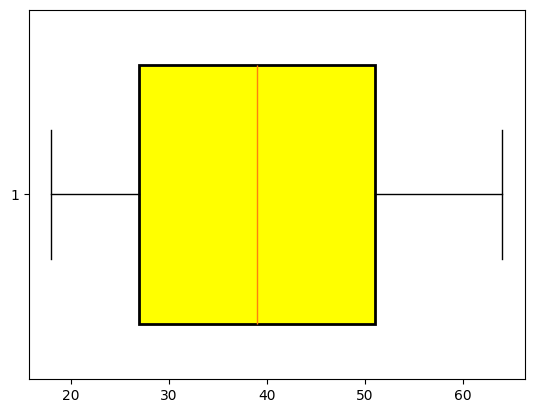

In [7]:
bp = plt.boxplot (data['age'], vert=False, patch_artist=True, widths=0.7)
plt.setp (bp['boxes'], linewidth=2, color='black')
plt.setp (bp['boxes'], facecolor='yellow')
plt.setp (bp['fliers'], markeredgecolor='red')

outlier = find_outliers(data['age'])
print(outlier)

#removing outliers
if outlier != []:
    for d in outlier:
        data = data[data['age'] != d] 

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


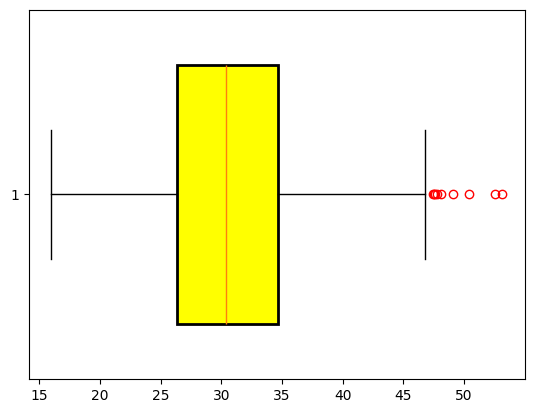

In [8]:
bp = plt.boxplot (data['bmi'], vert=False, patch_artist=True, widths=0.7)
plt.setp (bp['boxes'], linewidth=2, color='black')
plt.setp (bp['boxes'], facecolor='yellow')
plt.setp (bp['fliers'], markeredgecolor='red')

outlier = find_outliers(data['bmi'])
print(outlier)

#removing outliers
if outlier != []:
    for d in outlier:
        data = data[data['bmi'] != d] 

[]


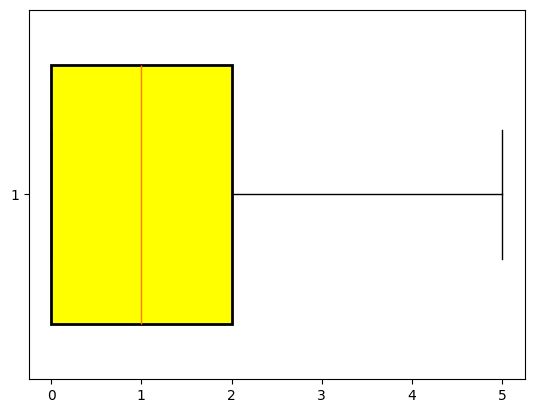

In [9]:
bp = plt.boxplot (data['children'], vert=False, patch_artist=True, widths=0.7)
plt.setp (bp['boxes'], linewidth=2, color='black')
plt.setp (bp['boxes'], facecolor='yellow')
plt.setp (bp['fliers'], markeredgecolor='red')

outlier = find_outliers(data['children'])
print(outlier)

#removing outliers
if outlier != []:
    for d in outlier:
        data = data[data['children'] != d] 

[39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 34439.8559, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254.41795, 36307.7983, 38792.6856, 55135.40

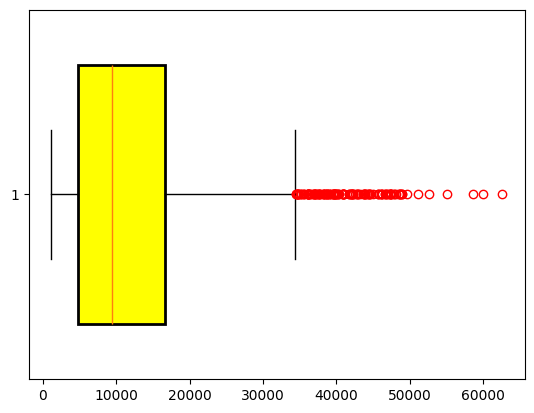

In [10]:
bp = plt.boxplot (data['charges'], vert=False, patch_artist=True, widths=0.7)
plt.setp (bp['boxes'], linewidth=2, color='black')
plt.setp (bp['boxes'], facecolor='yellow')
plt.setp (bp['fliers'], markeredgecolor='red')

outlier = find_outliers(data['charges'])
print(outlier)

#removing outliers
if outlier != []:
    for d in outlier:
        data = data[data['charges'] != d] 

### Categorical Features

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1191 non-null   int64  
 1   sex       1191 non-null   object 
 2   bmi       1191 non-null   float64
 3   children  1191 non-null   int64  
 4   smoker    1191 non-null   object 
 5   region    1191 non-null   object 
 6   charges   1191 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.4+ KB


In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data = pd.get_dummies(data, columns=['sex'], dtype=int)
data.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [14]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,southwest,16884.92400,1,0
1,18,33.770,1,0,southeast,1725.55230,0,1
2,28,33.000,3,0,southeast,4449.46200,0,1
3,33,22.705,0,0,northwest,21984.47061,0,1
4,32,28.880,0,0,northwest,3866.85520,0,1


In [15]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data = pd.get_dummies(data, columns=['region'], dtype=int)
data.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaling_col = [['age'], ['bmi'], ['children'], ['charges']]

for feature in scaling_col:
    data[feature] = scaler.fit_transform(data[feature])

data.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.387788,0.0,1,0.475058,1,0,0,0,0,1
1,0.000000,0.578435,0.2,0,0.018193,0,1,0,0,1,0
2,0.217391,0.553426,0.6,0,0.100285,0,1,0,0,1,0
3,0.326087,0.219065,0.0,0,0.628746,0,1,0,1,0,0
4,0.304348,0.419617,0.0,0,0.082727,0,1,0,1,0,0


## Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
X = data.drop(columns =['charges'])
y = data['charges'] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=False) # default split is random

linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Predicting/finding error val of training set
y_pred = linReg.predict(X_train)
error = mean_squared_error(y_train, y_pred)
error = error**0.5
print('train error =', error)

y_pred = linReg.predict(X_test)
error = mean_squared_error(y_test, y_pred)
error = error**0.5
print("test error =", error)

train error = 0.13615243141701489
test error = 0.13659472243964288


## Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)

polylin = LinearRegression()
polylin.fit(X_train, y_train)

train_pred = polylin.predict(X_train)
errorTrain = mean_squared_error(train_pred, y_train)

test_pred = polylin.predict(X_test)
errorTest = mean_squared_error(test_pred, y_test)

print('train error=', errorTrain, 'test error=', errorTest)

train error= 0.018658537166180766 test error= 0.018054249469020386


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestRegressor(n_estimators=100, max_depth=3, max_samples=0.63, max_features=10, criterion="poisson")
rfc.fit(X_train, y_train)

train_pred = rfc.predict(X_train)
errorTrain = mean_squared_error(train_pred, y_train)

test_pred = rfc.predict(X_test)
errorTest = mean_squared_error(test_pred, y_test)

print('train error=', errorTrain, 'test error=', errorTest)

train error= 0.01651837024015613 test error= 0.017442500524970747
